In [1]:
for (pkg in c("ggplot2", "dplyr", "patchwork", "ggplotify", "tidyr")) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                pkg,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [2]:
color_pallete_for_dose <- c(
    "0.0" = "#85FF33",
    "0.61" = "#75FF1A",
    "1.22" = "#62FF00",
    "2.44" = "#4DC507",
    "4.88" = "#398E0B",
    "9.77" = "#265A0C",
    "19.53" = "#132B08",
    "39.06" = "#620B8E",
    "78.13" = "#410C5A",
    "156.25" = "#21082B"
)
font_size <- 24
plot_themes <- (
    theme_bw()
    + theme(
        legend.position = "bottom",
        legend.text = element_text(size = font_size),
        legend.title = element_text(size = font_size),
        axis.title.x = element_text(size = font_size),
        axis.text.x = element_text(size = font_size),
        axis.title.y = element_text(size = font_size),
        axis.text.y = element_text(size = font_size),
        strip.text = element_text(size = font_size -2),
    )
    
    
)

In [3]:
predicted_results_file_path <- file.path("../results/model_test_predictions_all_time_points.parquet")
# load the final timepoint actual results
actual_results_file_path <- file.path("../results/cleaned_endpoint_profiles.parquet")
predicted_results <- arrow::read_parquet(predicted_results_file_path)
actual_results <- arrow::read_parquet(actual_results_file_path)
head(actual_results )
# convert time from float to integer
predicted_results$time <- as.integer(predicted_results$time)
head(predicted_results)
annexinv_feature <- "Cytoplasm_Intensity_IntegratedIntensity_AnnexinV"

Metadata_plate,Metadata_Well,Metadata_number_of_singlecells,Metadata_compound,Metadata_dose,Metadata_control,Metadata_ImageNumber,Metadata_FOV,Metadata_Time,Metadata_Cells_Number_Object_Number,⋯,Nuclei_Texture_Correlation_AnnexinV_3_02_256,Nuclei_Texture_Correlation_AnnexinV_3_03_256,Nuclei_Texture_Correlation_DNA_3_02_256,Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Nuclei_Texture_InverseDifferenceMoment_DNA_3_03_256,Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Nuclei_Texture_SumAverage_DNA_3_01_256,Metadata_Well_FOV,Metadata_sc_unique_track_id
<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,C-09,153,Staurosporine,39.06,positive,1,0002,13,1,⋯,-0.8329508,-0.66607081,0.6439793,-1.26771736,-1.8531628,0.4744497,-1.43775731,0.3475860,C-09_0002,C-09_0002_18
1,C-09,153,Staurosporine,39.06,positive,1,0002,13,3,⋯,-0.4713013,-0.58955826,-1.3215611,0.65260169,0.6682856,0.2608280,0.03405826,0.5664045,C-09_0002,C-09_0002_32
1,C-09,153,Staurosporine,39.06,positive,1,0002,13,6,⋯,-0.8329508,-0.66607081,0.6439793,-1.26771736,-1.8531628,0.4744497,-1.43775731,0.3475860,C-09_0002,C-09_0002_52
1,C-09,153,Staurosporine,39.06,positive,1,0002,13,8,⋯,0.2224150,-0.87261595,-1.1729746,-0.36957117,0.4275348,0.2209507,0.19314168,0.6472869,C-09_0002,C-09_0002_89
1,C-09,153,Staurosporine,39.06,positive,1,0002,13,9,⋯,-0.1729017,-0.92835925,-0.8548070,0.01843735,0.4636937,0.2080272,0.11898326,0.6607623,C-09_0002,C-09_0002_162
1,C-09,153,Staurosporine,39.06,positive,1,0002,13,22,⋯,0.1672454,-0.05581052,-0.5353087,-0.67736229,0.1941160,-0.3090465,0.54550368,2.4997174,C-09_0002,C-09_0002_115


Model_type,Train_test_key,Model_name,dose,time,sc_unique_track_id,shuffle,Cytoplasm_Intensity_IntegratedIntensity_AnnexinV,Cytoplasm_AreaShape_Area,Cytoplasm_AreaShape_Compactness,⋯,Nuclei_Texture_Correlation_AnnexinV_3_00_256,Nuclei_Texture_Correlation_AnnexinV_3_01_256,Nuclei_Texture_Correlation_AnnexinV_3_02_256,Nuclei_Texture_Correlation_AnnexinV_3_03_256,Nuclei_Texture_Correlation_DNA_3_02_256,Nuclei_Texture_DifferenceVariance_AnnexinV_3_01_256,Nuclei_Texture_InverseDifferenceMoment_AnnexinV_3_03_256,Nuclei_Texture_InverseDifferenceMoment_DNA_3_03_256,Nuclei_Texture_SumAverage_AnnexinV_3_00_256,Nuclei_Texture_SumAverage_DNA_3_01_256
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
single_feature,train,elastic_net_single_terminal_features_model,39.06,0,C-09_0002_9,Model,0.118350170,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
single_feature,train,elastic_net_single_terminal_features_model,39.06,0,C-09_0002_15,Model,0.006795014,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
single_feature,train,elastic_net_single_terminal_features_model,39.06,0,C-09_0002_26,Model,0.310491037,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
single_feature,train,elastic_net_single_terminal_features_model,39.06,0,C-09_0002_40,Model,0.115991943,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
single_feature,train,elastic_net_single_terminal_features_model,39.06,0,C-09_0002_47,Model,0.072022071,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
single_feature,train,elastic_net_single_terminal_features_model,39.06,0,C-09_0002_48,Model,-0.021673891,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
unique(predicted_results$shuffle)

[1] "Model"             "Shuffled baseline"

In [5]:
# rename some of the columns in the actual results for consistency
actual_results <- actual_results %>%
    dplyr::rename(
        sc_unique_track_id = "Metadata_sc_unique_track_id",
        dose = "Metadata_dose",
        time = "Metadata_Time"
     ) %>%
     select(
            sc_unique_track_id,
            dose,
            time,
            all_of(annexinv_feature)
        )
actual_results$Model_type <- "single_feature"
actual_results$shuffle <- "Model"
# copy all of the the actual results
shuffled_actual_results <- actual_results
shuffled_actual_results$shuffle <- "Shuffled baseline"
actual_results <- rbind(actual_results, shuffled_actual_results)
# drop rows in actual_results that do have the Metadata_sc_unique_track_id in the predicted_results
actual_results <- actual_results %>%
    filter(sc_unique_track_id %in% predicted_results$sc_unique_track_id)
# add columns to actual_results to match predicted_results
for (col in setdiff(names(predicted_results), names(actual_results))) {
    actual_results[[col]] <- NA
}
print(dim(predicted_results))
print(dim(actual_results))
# Reorder columns to match
actual_results <- actual_results[names(predicted_results)]

# Now try the rbind
predicted_results <- rbind(predicted_results, actual_results)


[1] 293056    517
[1] 16812   517


In [6]:
unique(predicted_results$time)
unique(predicted_results$dose)
# replace '0' dose with '0.0' for consistency
predicted_results$dose <- as.character(predicted_results$dose)
predicted_results$dose[predicted_results$dose == "0"] <- "0.0"
predicted_results$dose <- factor(
    predicted_results$dose,
    levels = c(
        "0.0", "0.61", "1.22", "2.44", "4.88",
        "9.77", "19.53", "39.06", "78.13", "156.25"
    )
)


[1]  0  2  3  4  5  6  8  9 10 11 12  1  7 13

[1] "39.06"  "4.88"   "9.77"   "0.61"   "2.44"   "156.25" "19.53"  "1.22"  
 [9] "78.13"  "0.0"    "0"

In [7]:
unique(predicted_results$dose)

[1] 39.06  4.88   9.77   0.61   2.44   156.25 19.53  1.22   78.13  0.0   
Levels: 0.0 0.61 1.22 2.44 4.88 9.77 19.53 39.06 78.13 156.25

In [8]:
predicted_results$time <- predicted_results$time * 30 # minutes

In [9]:
predicted_results <- predicted_results %>%
    select(
        sc_unique_track_id,
        dose,
        time,
        Model_type,
        Train_test_key,
        all_of(annexinv_feature),
        shuffle
    )
head(predicted_results)
tail(predicted_results)

sc_unique_track_id,dose,time,Model_type,Train_test_key,Cytoplasm_Intensity_IntegratedIntensity_AnnexinV,shuffle
<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<chr>
C-09_0002_9,39.06,0,single_feature,train,0.118350170,Model
C-09_0002_15,39.06,0,single_feature,train,0.006795014,Model
C-09_0002_26,39.06,0,single_feature,train,0.310491037,Model
C-09_0002_40,39.06,0,single_feature,train,0.115991943,Model
C-09_0002_47,39.06,0,single_feature,train,0.072022071,Model
C-09_0002_48,39.06,0,single_feature,train,-0.021673891,Model


sc_unique_track_id,dose,time,Model_type,Train_test_key,Cytoplasm_Intensity_IntegratedIntensity_AnnexinV,shuffle
<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<chr>
E-04_0003_80,1.22,390,single_feature,NA,0.5980562,Shuffled baseline
E-04_0003_179,1.22,390,single_feature,NA,0.0836616,Shuffled baseline
E-04_0003_64,1.22,390,single_feature,NA,-1.2277028,Shuffled baseline
E-04_0003_106,1.22,390,single_feature,NA,-0.5655937,Shuffled baseline
E-04_0003_148,1.22,390,single_feature,NA,-0.9586738,Shuffled baseline
E-04_0003_31,1.22,390,single_feature,NA,-1.0807310,Shuffled baseline


In [35]:
subset_predicted_results <- predicted_results %>%
    # get only the single_feature model and test set
    filter(
        Model_type == "single_feature",
        # Train_test_key == "train",
    #     # dose == '0.0',
        # time < 13*30
    ) %>%
    group_by(sc_unique_track_id) %>%
    # filter for tracks that have at least all time points
    # filter(n() == max(predicted_results$time)/30) %>%
    ungroup() 

In [36]:
head(subset_predicted_results)
unique(subset_predicted_results$shuffle)

sc_unique_track_id,dose,time,Model_type,Train_test_key,Cytoplasm_Intensity_IntegratedIntensity_AnnexinV,shuffle
<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<chr>
C-09_0002_9,39.06,0,single_feature,train,0.118350170,Model
C-09_0002_15,39.06,0,single_feature,train,0.006795014,Model
C-09_0002_26,39.06,0,single_feature,train,0.310491037,Model
C-09_0002_40,39.06,0,single_feature,train,0.115991943,Model
C-09_0002_47,39.06,0,single_feature,train,0.072022071,Model
C-09_0002_48,39.06,0,single_feature,train,-0.021673891,Model


[1] "Model"             "Shuffled baseline"

Warning message:
“Removed 3533 rows containing missing values (`geom_line()`).”


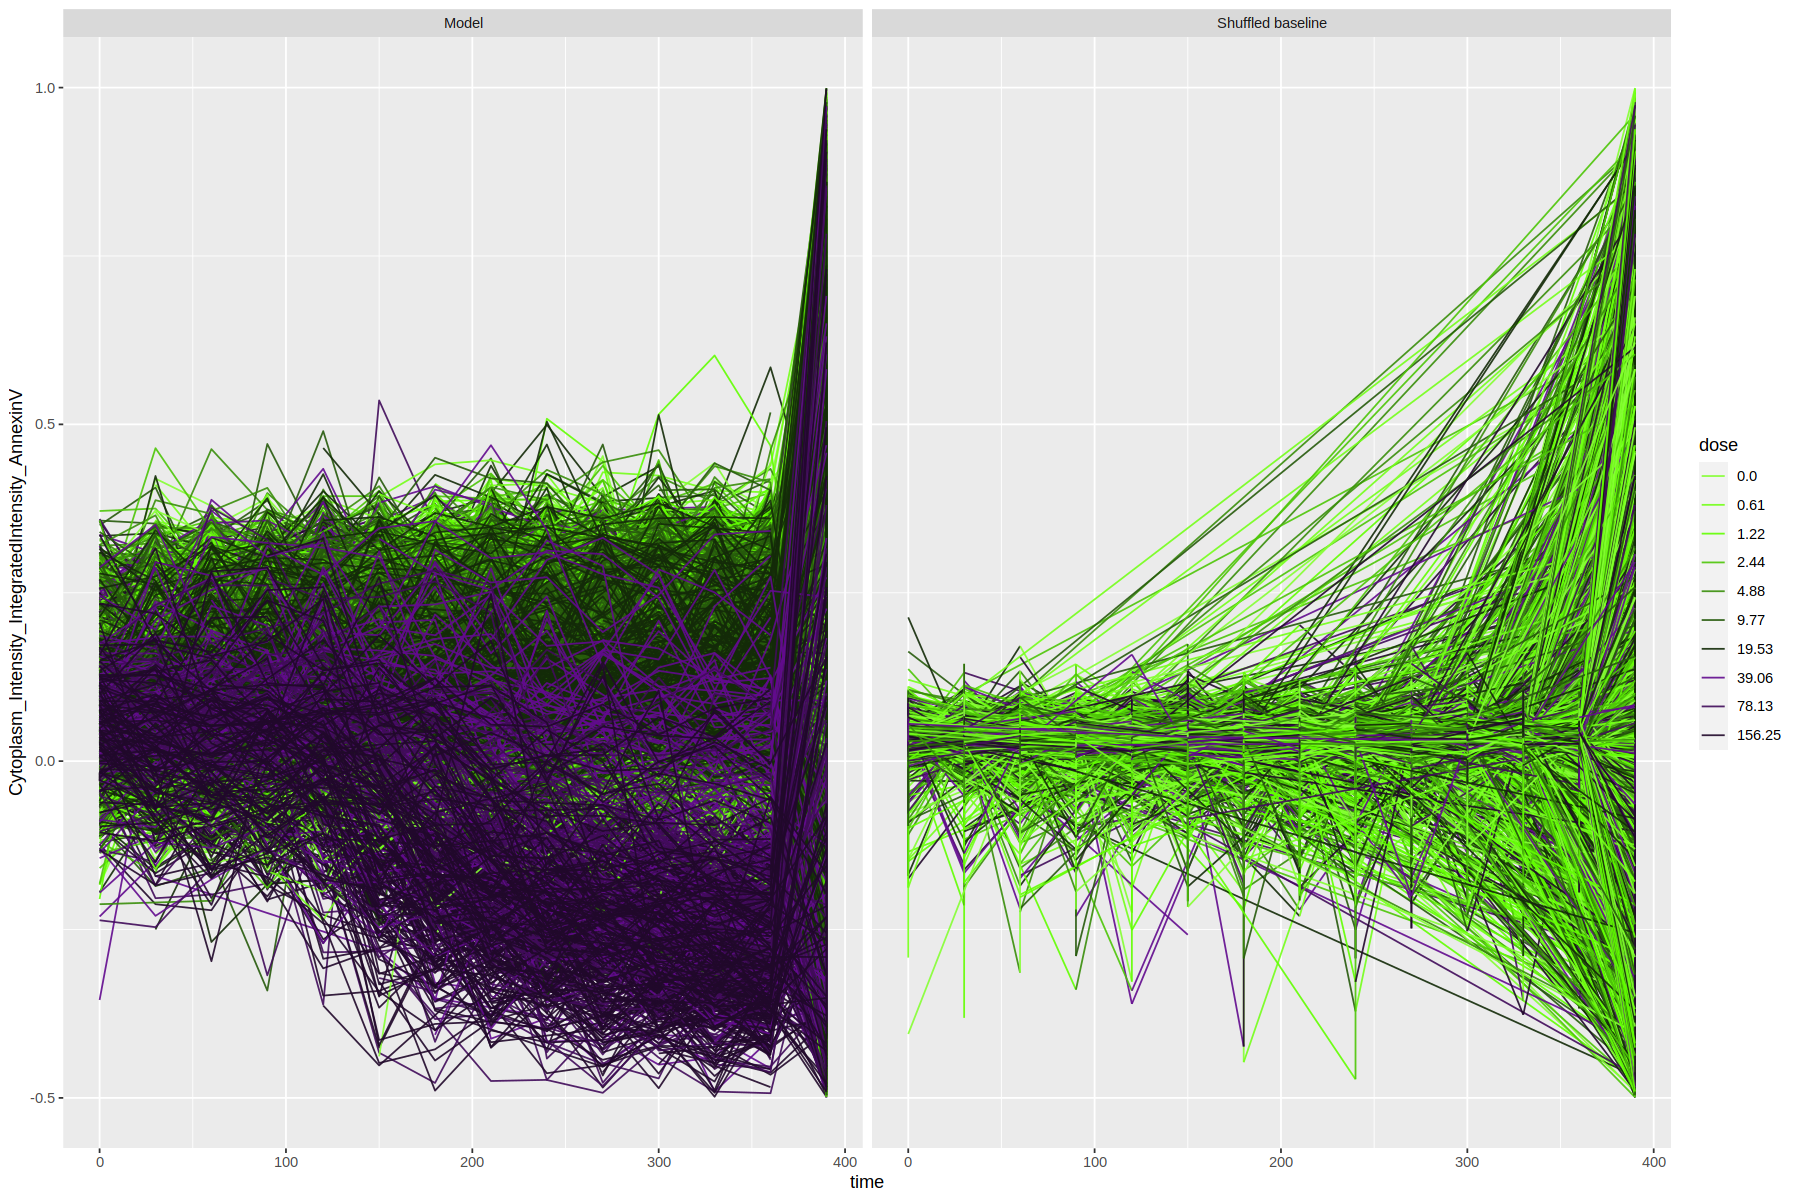

In [37]:
width <- 15
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
predicted_plot <- (
    ggplot(
        data = subset_predicted_results,
        aes_string(
            x = "time",
            y = 'Cytoplasm_Intensity_IntegratedIntensity_AnnexinV',
            group = "sc_unique_track_id",
            color = "dose"
        )
    )
    + geom_line(stat = "identity", alpha = 0.9)
    + scale_color_manual(values = color_pallete_for_dose)
    + ylim(-0.5,1)
    + facet_wrap(.~shuffle)
)
predicted_plot

`geom_smooth()` using formula = 'y ~ x'


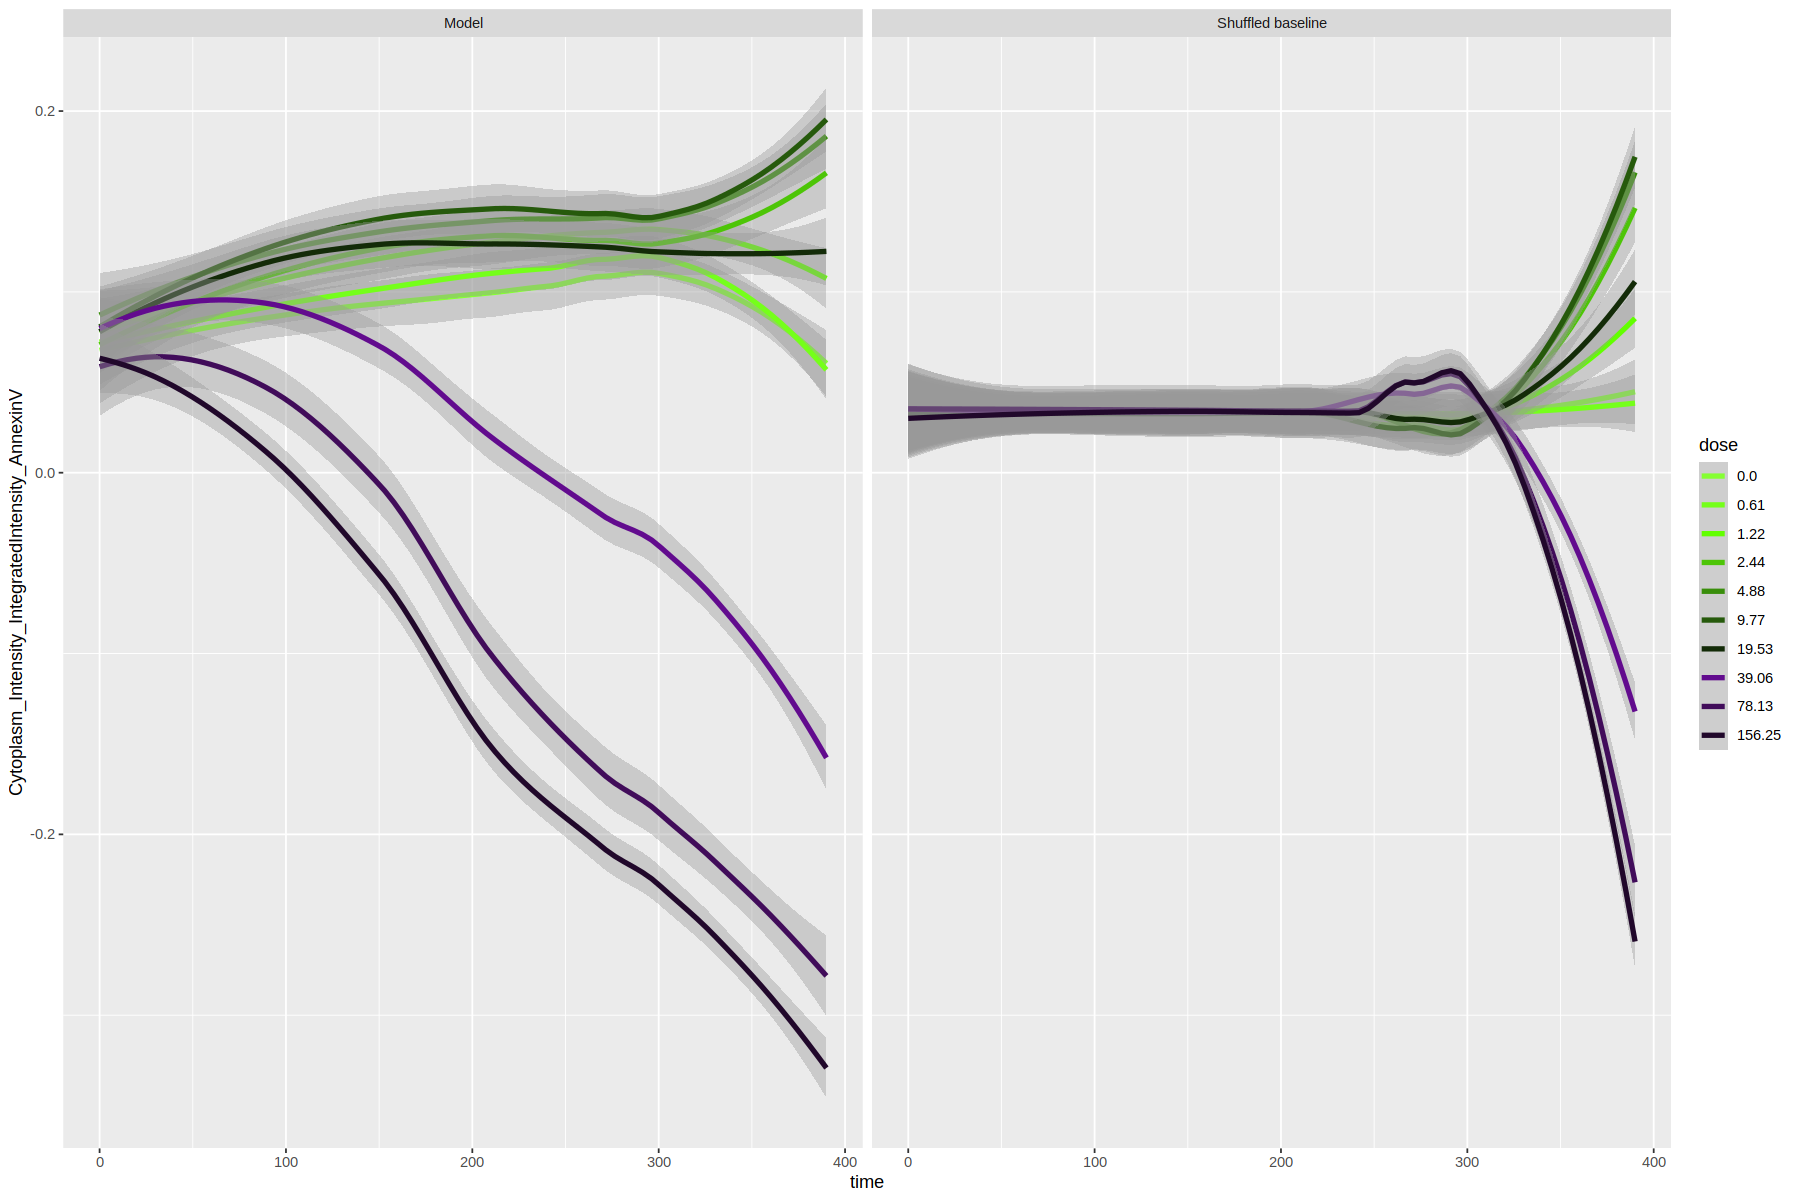

In [38]:

predicted_plot <- (
    ggplot(
        data = subset_predicted_results,
        aes_string(
            x = "time",
            y = 'Cytoplasm_Intensity_IntegratedIntensity_AnnexinV',
            # group = "sc_unique_track_id",
            
            color = "dose"
        )
    )
    + geom_smooth(method = "loess", se = TRUE, size = 1.5)
    + scale_color_manual(values = color_pallete_for_dose)
    + facet_wrap(.~shuffle)
)
predicted_plot